In [1]:
import sklearn
import numpy as np
import pandas as pd
import joblib
import random
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # XGBoost for regression
from lightgbm import LGBMRegressor  # LightGBM for regression
from catboost import CatBoostRegressor  # CatBoost for regression
from sklearn.ensemble import AdaBoostRegressor  # AdaBoost for regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting for regression
from sklearn.ensemble import StackingRegressor  # Stacking for regression
from sklearn.model_selection import cross_val_score  # For model evaluation
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, 
    AdaBoostRegressor, ExtraTreesRegressor
)
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Additional imports
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import ipywidgets as widgets
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [2]:
file_path = "/home/kumail/Energy_AI/Honey Model/Dataset/Dataset.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["Log BCF old"]) #,'Absolute Concentration', 'Retention Time'
df

,Relative Concentration,Absolute Concentration,Log KOW,Log BCF,Retention Time,HRI
0,36.04,0.06,-0.39,0.50,37.320,0.022
1,21.46,0.03,-0.81,0.50,18.500,0.000
2,21.60,0.08,-0.32,0.50,17.080,0.418
3,98.96,0.15,1.58,0.71,10.900,0.247
4,64.54,0.10,-0.12,0.50,5.269,0.601
...,...,...,...,...,...,...
134,79.25,0.20,3.41,1.92,22.146,4.674
135,10.00,0.01,-0.05,5.40,5.579,0.041
136,10.49,0.01,0.77,0.50,6.629,0.080
137,9.92,0.01,2.10,0.50,6.809,0.016


In [3]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
Relative Concentration    0
Absolute Concentration    0
Log KOW                   0
Log BCF                   0
Retention Time            0
HRI                       0
dtype: int64


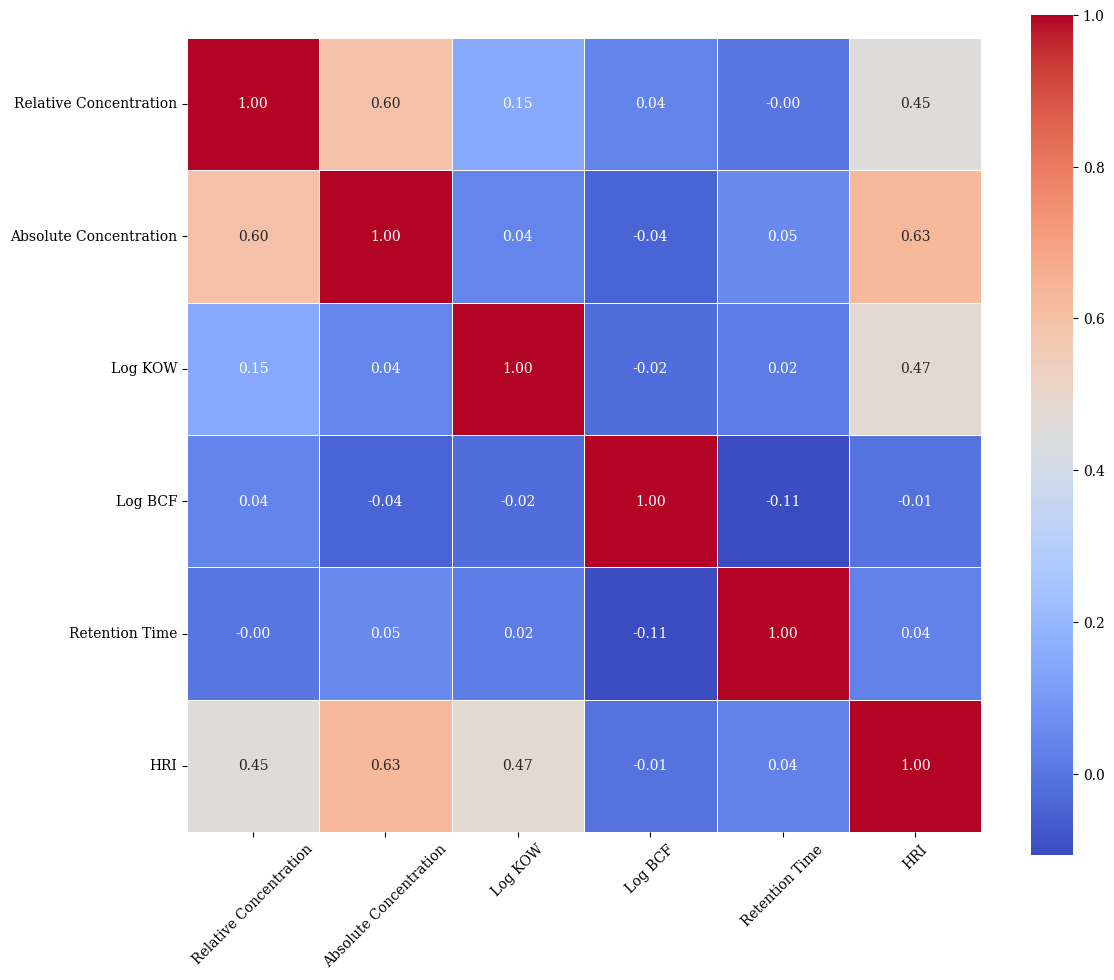

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
Y = df['HRI']
X = df.drop(["HRI"], axis=1)
X


,Relative Concentration,Absolute Concentration,Log KOW,Log BCF,Retention Time
0,36.04,0.06,-0.39,0.50,37.320
1,21.46,0.03,-0.81,0.50,18.500
2,21.60,0.08,-0.32,0.50,17.080
3,98.96,0.15,1.58,0.71,10.900
4,64.54,0.10,-0.12,0.50,5.269
...,...,...,...,...,...
134,79.25,0.20,3.41,1.92,22.146
135,10.00,0.01,-0.05,5.40,5.579
136,10.49,0.01,0.77,0.50,6.629
137,9.92,0.01,2.10,0.50,6.809


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(X)
data_scaled

array([[3.60828931e-01, 7.14285714e-02, 1.03878116e-01, 1.57480315e-02,
        9.81462413e-02],
       [2.12718407e-01, 3.57142857e-02, 7.47922438e-02, 1.57480315e-02,
        4.09813409e-02],
       [2.14140593e-01, 9.52380952e-02, 1.08725762e-01, 1.57480315e-02,
        3.66681550e-02],
       [1.00000000e+00, 1.78571429e-01, 2.40304709e-01, 4.33070866e-02,
        1.78966840e-02],
       [6.50345388e-01, 1.19047619e-01, 1.22576177e-01, 1.57480315e-02,
        7.92775717e-04],
       [6.09508330e-02, 1.19047619e-02, 7.47922438e-02, 1.57480315e-02,
        2.73370937e-04],
       [3.27102804e-02, 0.00000000e+00, 7.47922438e-02, 1.57480315e-02,
        6.11348539e-02],
       [5.70296627e-01, 8.33333333e-02, 1.22576177e-01, 1.57480315e-02,
        1.58333409e-01],
       [2.47866721e-02, 0.00000000e+00, 2.15373961e-01, 1.31233596e-02,
        1.00000000e+00],
       [2.19829338e-01, 2.38095238e-02, 3.97506925e-01, 2.40157480e-01,
        5.16367325e-04],
       [2.54063389e-01, 2.3809

In [7]:
from sklearn.model_selection import train_test_split
def split_and_scale_data(X, Y, test_size=0.10, random_state=42):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"After preprocessing Training set size: {X_train.shape}")
    print(f"After preprocessing Test set size: {X_test.shape}")
    
    
    return X_train, X_test, Y_train,  Y_test
X_train_scaled,  X_test_scaled, Y_train,  Y_test = split_and_scale_data(data_scaled, Y)

Training set size: 125
Test set size: 14
After preprocessing Training set size: (125, 5)
After preprocessing Test set size: (14, 5)


### Optuna

In [8]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import optuna

# Optional: Fix randomness
SEED = 42

# Define evaluation metrics
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return r2, rmse, mae

# OPTUNA Optimization for each model
def optimize_model(name, model_name, X_train, X_test, y_train, y_test, n_trials=100):
    def objective(trial):
        if model_name == "Gradient Boosting":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 300),
                "max_depth": trial.suggest_int("max_depth", 2, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            }
            model = GradientBoostingRegressor(**params, random_state=SEED)

        elif model_name == "AdaBoost":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 300),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0),
            }
            model = AdaBoostRegressor(**params, random_state=SEED)

        elif model_name == "CatBoost":
            params = {
                "iterations": trial.suggest_int("iterations", 50, 300),
                "depth": trial.suggest_int("depth", 3, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
                "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0)
            }
            model = CatBoostRegressor(**params, verbose=False, random_state=SEED)

        elif model_name == "KNN":
            params = {
                "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
                "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
                "p": trial.suggest_int("p", 1, 2)
            }
            model = KNeighborsRegressor(**params)

        elif model_name == "SVR":
            params = {
                "C": trial.suggest_float("C", 0.1, 100.0, log=True),
                "epsilon": trial.suggest_float("epsilon", 0.01, 1.0),
                "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
            }
            model = SVR(**params)
        elif model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 50, 300),
                "max_depth": trial.suggest_int("max_depth", 2, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
                "gamma": trial.suggest_float("gamma", 0, 5),
                "reg_alpha": trial.suggest_float("reg_alpha", 0, 1.0),
                "reg_lambda": trial.suggest_float("reg_lambda", 0, 1.0)
            }
            model = XGBRegressor(**params, objective='reg:squarederror', random_state=SEED, verbosity=0)

        else:
            raise ValueError("Unknown model")

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        return r2_score(y_test, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    print(f"\n>>> Best R² for {model_name}: {study.best_value:.4f}")
    print(f"Best params for {model_name}: {study.best_params}\n")

    # Train the best model and evaluate it
    best_params = study.best_params
    if model_name == "Gradient Boosting":
        model = GradientBoostingRegressor(**best_params, random_state=SEED)
    elif model_name == "AdaBoost":
        model = AdaBoostRegressor(**best_params, random_state=SEED)
    elif model_name == "CatBoost":
        model = CatBoostRegressor(**best_params, verbose=False, random_state=SEED)
    elif model_name == "KNN":
        model = KNeighborsRegressor(**best_params)
    elif model_name == "SVR":
        model = SVR(**best_params)
    elif model_name == "XGBoost":
        model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=SEED, verbosity=0)

    evaluate_model(model_name, model, X_train, X_test, y_train, y_test)

# Define model names
model_names = ["Gradient Boosting", "AdaBoost", "CatBoost", "KNN", "SVR", "XGBoost"]

# Run optimization
for name in model_names:
    optimize_model(name, name, X_train_scaled, X_test_scaled, Y_train, Y_test)


[I 2025-05-29 15:14:57,358] A new study created in memory with name: no-name-63f52126-de59-44f9-ba41-ed35bb109bf1
[I 2025-05-29 15:14:57,533] Trial 0 finished with value: 0.27164828836852806 and parameters: {'n_estimators': 226, 'max_depth': 8, 'learning_rate': 0.24151843450298655, 'subsample': 0.9540950760138431}. Best is trial 0 with value: 0.27164828836852806.
[I 2025-05-29 15:14:57,753] Trial 1 finished with value: -0.7618405177764407 and parameters: {'n_estimators': 273, 'max_depth': 10, 'learning_rate': 0.11911116520536696, 'subsample': 0.8086602258429484}. Best is trial 0 with value: 0.27164828836852806.
[I 2025-05-29 15:14:57,849] Trial 2 finished with value: -1.4971374820163286 and parameters: {'n_estimators': 132, 'max_depth': 7, 'learning_rate': 0.2957981571679004, 'subsample': 0.7430493348670412}. Best is trial 0 with value: 0.27164828836852806.
[I 2025-05-29 15:14:58,031] Trial 3 finished with value: 0.36054327520363705 and parameters: {'n_estimators': 233, 'max_depth': 9,


>>> Best R² for Gradient Boosting: 0.6915
Best params for Gradient Boosting: {'n_estimators': 106, 'max_depth': 7, 'learning_rate': 0.17607175372622794, 'subsample': 0.8633314901788955}

--- Gradient Boosting ---
R²: 0.6915
RMSE: 0.2359
MAE: 0.1473


[I 2025-05-29 15:15:09,445] Trial 1 finished with value: 0.4406860530319292 and parameters: {'n_estimators': 107, 'learning_rate': 0.09243985238304334}. Best is trial 0 with value: 0.7468252860799803.
[I 2025-05-29 15:15:09,492] Trial 2 finished with value: 0.5583372124347308 and parameters: {'n_estimators': 60, 'learning_rate': 0.6808247519564242}. Best is trial 0 with value: 0.7468252860799803.
[I 2025-05-29 15:15:09,519] Trial 3 finished with value: 0.6124093006291428 and parameters: {'n_estimators': 74, 'learning_rate': 0.8378611091523864}. Best is trial 0 with value: 0.7468252860799803.
[I 2025-05-29 15:15:09,578] Trial 4 finished with value: 0.3064266545848511 and parameters: {'n_estimators': 140, 'learning_rate': 0.3494426087728625}. Best is trial 0 with value: 0.7468252860799803.
[I 2025-05-29 15:15:09,621] Trial 5 finished with value: 0.49352452204418573 and parameters: {'n_estimators': 101, 'learning_rate': 0.6755201179837302}. Best is trial 0 with value: 0.7468252860799803.



>>> Best R² for AdaBoost: 0.8039
Best params for AdaBoost: {'n_estimators': 135, 'learning_rate': 0.5302802505938339}

--- AdaBoost ---
R²: 0.8039
RMSE: 0.1881
MAE: 0.1620


[I 2025-05-29 15:15:15,474] Trial 0 finished with value: 0.7478072585138094 and parameters: {'iterations': 244, 'depth': 9, 'learning_rate': 0.031761555202341626, 'l2_leaf_reg': 4.094093019109372}. Best is trial 0 with value: 0.7478072585138094.
[I 2025-05-29 15:15:15,827] Trial 1 finished with value: 0.5695019976141993 and parameters: {'iterations': 289, 'depth': 8, 'learning_rate': 0.2102989739659288, 'l2_leaf_reg': 2.5289138872920813}. Best is trial 0 with value: 0.7478072585138094.
[I 2025-05-29 15:15:16,014] Trial 2 finished with value: 0.6003933171839442 and parameters: {'iterations': 248, 'depth': 6, 'learning_rate': 0.13952214684006534, 'l2_leaf_reg': 5.486286560629019}. Best is trial 0 with value: 0.7478072585138094.
[I 2025-05-29 15:15:16,158] Trial 3 finished with value: 0.8647248897361698 and parameters: {'iterations': 236, 'depth': 5, 'learning_rate': 0.06767154502672071, 'l2_leaf_reg': 7.584860462400092}. Best is trial 3 with value: 0.8647248897361698.
[I 2025-05-29 15:15


>>> Best R² for CatBoost: 0.8773
Best params for CatBoost: {'iterations': 160, 'depth': 9, 'learning_rate': 0.26589605439661934, 'l2_leaf_reg': 9.728475863929507}



[I 2025-05-29 15:15:53,018] A new study created in memory with name: no-name-364dee65-5597-4bd0-891b-ded790128cec
[I 2025-05-29 15:15:53,022] Trial 0 finished with value: 0.5594384056838321 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.5594384056838321.
[I 2025-05-29 15:15:53,026] Trial 1 finished with value: -0.7053311601855574 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.5594384056838321.
[I 2025-05-29 15:15:53,029] Trial 2 finished with value: 0.22022462618343974 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.5594384056838321.
[I 2025-05-29 15:15:53,032] Trial 3 finished with value: 0.5513009444343524 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.5594384056838321.
[I 2025-05-29 15:15:53,036] Trial 4 finished with value: 0.7239891411421732 and parameters: {'n_neighbors': 16, 'weights'

--- CatBoost ---
R²: 0.8773
RMSE: 0.1487
MAE: 0.1057


[I 2025-05-29 15:15:53,224] Trial 22 finished with value: 0.7344532383173059 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.7344532383173059.
[I 2025-05-29 15:15:53,237] Trial 23 finished with value: 0.6004384138215745 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.7344532383173059.
[I 2025-05-29 15:15:53,250] Trial 24 finished with value: 0.7344532383173059 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.7344532383173059.
[I 2025-05-29 15:15:53,263] Trial 25 finished with value: 0.651432106500234 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.7344532383173059.
[I 2025-05-29 15:15:53,276] Trial 26 finished with value: 0.6924401929341861 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 2}. Best is trial 15 with value: 0.7344532383173059.
[I 2025-05-29 15:15:53,288] Tria


>>> Best R² for KNN: 0.7500
Best params for KNN: {'n_neighbors': 10, 'weights': 'uniform', 'p': 2}

--- KNN ---
R²: 0.7500
RMSE: 0.2123
MAE: 0.1633


[I 2025-05-29 15:15:54,532] Trial 19 finished with value: 0.5271885444417668 and parameters: {'C': 19.752358135042947, 'epsilon': 0.42143899933713924, 'kernel': 'linear'}. Best is trial 4 with value: 0.5665018304634357.
[I 2025-05-29 15:15:54,544] Trial 20 finished with value: 0.45254675222298846 and parameters: {'C': 1.0687587067224915, 'epsilon': 0.19063558793570223, 'kernel': 'rbf'}. Best is trial 4 with value: 0.5665018304634357.
[I 2025-05-29 15:15:54,559] Trial 21 finished with value: 0.4915947537877885 and parameters: {'C': 1.222417774544182, 'epsilon': 0.08961038694380369, 'kernel': 'poly'}. Best is trial 4 with value: 0.5665018304634357.
[I 2025-05-29 15:15:54,572] Trial 22 finished with value: -0.5025215990398042 and parameters: {'C': 0.10169416820308073, 'epsilon': 0.30211998589195727, 'kernel': 'poly'}. Best is trial 4 with value: 0.5665018304634357.
[I 2025-05-29 15:15:54,587] Trial 23 finished with value: 0.570701409454656 and parameters: {'C': 2.0568386632658484, 'epsilo


>>> Best R² for SVR: 0.7350
Best params for SVR: {'C': 2.7571292848815023, 'epsilon': 0.18651326324672052, 'kernel': 'poly'}

--- SVR ---
R²: 0.7350
RMSE: 0.2186
MAE: 0.1683


[I 2025-05-29 15:16:20,685] Trial 0 finished with value: 0.10493793321458633 and parameters: {'n_estimators': 221, 'max_depth': 10, 'learning_rate': 0.01783165750648774, 'subsample': 0.8879042757703514, 'colsample_bytree': 0.9028845296303712, 'gamma': 0.7554783241041502, 'reg_alpha': 0.8656209193181221, 'reg_lambda': 0.3079262604948978}. Best is trial 0 with value: 0.10493793321458633.
[I 2025-05-29 15:16:26,788] Trial 1 finished with value: 0.30822994899537304 and parameters: {'n_estimators': 222, 'max_depth': 2, 'learning_rate': 0.16843655106246322, 'subsample': 0.8037393492197654, 'colsample_bytree': 0.9846159042570498, 'gamma': 4.450855017159212, 'reg_alpha': 0.9056456642444656, 'reg_lambda': 0.6452775891871507}. Best is trial 1 with value: 0.30822994899537304.
[I 2025-05-29 15:16:35,224] Trial 2 finished with value: -0.08457005428550257 and parameters: {'n_estimators': 139, 'max_depth': 7, 'learning_rate': 0.08917349823640112, 'subsample': 0.5639908743173061, 'colsample_bytree': 0


>>> Best R² for XGBoost: 0.8156
Best params for XGBoost: {'n_estimators': 90, 'max_depth': 3, 'learning_rate': 0.19497850618881038, 'subsample': 0.9142264243884513, 'colsample_bytree': 0.9276789484259251, 'gamma': 2.8559444159020733, 'reg_alpha': 0.9283563472644208, 'reg_lambda': 0.31032718386676095}

--- XGBoost ---
R²: 0.8156
RMSE: 0.1824
MAE: 0.1677


### CatBoost

In [10]:
CB_model = CatBoostRegressor(
        iterations=214,
        depth=8,
        learning_rate=0.2340820169767359,
        l2_leaf_reg=6.225477291266719,
        verbose=False,
        random_seed=42
    )
CB_model.fit(X_train_scaled, Y_train)
CB_y_pred =CB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, CB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,CB_y_pred))
mae = mean_absolute_error(Y_test, CB_y_pred)
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.9131
RMSE: 0.1252
MAE: 0.0787


### Gradient Boosting

In [11]:
GB_model = GradientBoostingRegressor(
        n_estimators=240,
        max_depth=2,
        learning_rate=0.1693185165802676,
        subsample=0.90670583336002211,
        random_state=42  # You can replace 42 with any integer
    )
GB_model.fit(X_train_scaled, Y_train)
GB_y_pred =GB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, GB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, GB_y_pred))
mae = mean_absolute_error(Y_test, GB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.8611
RMSE: 0.1583
MAE: 0.1154


### AdaBoost

In [12]:
AB_model = AdaBoostRegressor(
        n_estimators=220,
        learning_rate=0.6110141765616156,
        random_state=42
    )
AB_model.fit(X_train_scaled, Y_train)
AB_y_pred =AB_model.predict( X_test_scaled)
r2 = r2_score(Y_test, AB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,AB_y_pred))
mae = mean_absolute_error(Y_test, AB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.8260
RMSE: 0.1771
MAE: 0.1458


### KNN

In [14]:
KNN_model = KNeighborsRegressor(n_neighbors=  13, weights= 'uniform', p= 2) 
KNN_model.fit(X_train_scaled, Y_train)
KNN_y_pred = KNN_model.predict(X_test_scaled)

r2 = r2_score(Y_test, KNN_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, KNN_y_pred))
mae = mean_absolute_error(Y_test, KNN_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.7643
RMSE: 0.2061
MAE: 0.1631


### XGBoost

In [16]:
XGB_model = XGBRegressor(
    n_estimators=104,
    max_depth=8,
    learning_rate=0.30541491724981196,
    subsample=0.9025341529483382,
    gamma=3.9138206866200185,
    colsample_bytree=0.5972442078505764,
    reg_alpha=0.5834902675049711,
    reg_lambda=0.8835056561578243,
    objective='reg:squarederror',
    random_state=42
)
XGB_model.fit(X_train_scaled, Y_train)
XGB_y_pred = XGB_model.predict(X_test_scaled)

r2 = r2_score(Y_test, XGB_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, XGB_y_pred))
mae = mean_absolute_error(Y_test, XGB_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.7624
RMSE: 0.2070
MAE: 0.1556


### Support Vector Machine

In [17]:
import numpy as np
import random

# Set global seed for reproducibility
np.random.seed(42)
random.seed(42)
SVR_model = SVR(
        C=22.043103385113717,
        epsilon=0.2202534452063814,
        kernel='linear'
    )
SVR_model.fit(X_train_scaled, Y_train)
SVR_y_pred =SVR_model.predict( X_test_scaled)
r2 = r2_score(Y_test, SVR_y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,SVR_y_pred))
mae = mean_absolute_error(Y_test, SVR_y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.7337
RMSE: 0.2192
MAE: 0.1551


### Ensemble Models

In [18]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

base_estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('ada', AdaBoostRegressor(random_state=42)),
    ('et', ExtraTreesRegressor(random_state=42)),
    ('xgb', XGBRegressor(verbosity=0, random_state=42)),
    ('lgbm', LGBMRegressor(verbose=-1, random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42)),
    ('svr', SVR())
]

final_estimator = SVR()

stacking_model = StackingRegressor(
    estimators=base_estimators, 
    final_estimator=final_estimator,
)
stacking_model.fit(X_train_scaled, Y_train )
predictions = stacking_model.predict(X_test_scaled)

r2 = r2_score(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
mae = mean_absolute_error(Y_test, predictions)

print(f"--- {'Ensemble Stacking'} ---")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

--- Ensemble Stacking ---
R²: 0.6647
RMSE: 0.2459
MAE: 0.1655


### SHAP

In [39]:
import shap
explainer = shap.KernelExplainer(CB_model.predict, X_train_scaled)

Using 125 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [48]:
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled,feature_names=X.columns)

  0%|          | 0/14 [00:00<?, ?it/s]

In [49]:
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt
import pandas as pd

# Define the original feature names
original_feature_names = X.columns  # X must be your original unscaled DataFrame

# Define features to exclude
exclude_features = ["Relative Concentration", "Retention Time"]

# Create mask of features to keep
keep_mask = ~original_feature_names.isin(exclude_features)

# Apply mask to NumPy array and SHAP values
X_test_filtered = X_test_scaled[:, keep_mask]
filtered_feature_names = original_feature_names[keep_mask]
shap_values_filtered = shap_values[:, keep_mask]

# Plot violin
shap.plots.violin(
    shap_values_filtered,
    features=X_test_filtered,
    feature_names=filtered_feature_names,
    plot_type="layered_violin"
)
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/CatBoost_shap_violin_plot.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.close()

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #2 for feature Log BCF, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #3 for feature Log BCF, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #4 for feature Log BCF, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/shap/plots/_violin.py:271: UserWarning: not enough data in bin #5 for feature Log BCF, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/s

In [ ]:
#feat_names = list(Y.columns)
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt

shap.plots.violin(
    shap_values,
    features=X_test_scaled,
    feature_names=X.columns, # Explicitly set number of features
    plot_type="layered_violin"
)
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/CatBoost_shap_violin_plot.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.close()

In [40]:
import shap
import pandas as pd
import numpy as np

# Compute mean absolute SHAP values for all features
shap_values = explainer.shap_values(X)  # assuming explainer and X are defined
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mean|SHAP|': mean_abs_shap
}).sort_values(by='Mean|SHAP|', ascending=False)

print(shap_importance)


  0%|          | 0/139 [00:00<?, ?it/s]

                  Feature  Mean|SHAP|
2                 Log KOW    1.460613
4          Retention Time    0.467945
3                 Log BCF    0.256765
0  Relative Concentration    0.247811
1  Absolute Concentration    0.098190


### Predication Visualization

In [8]:
from joblib import load
GB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl"
GB_model = load(GB_model_path)
GB_model_pred = GB_model.predict(X_test_scaled)
CB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl"
CB_model = load(CB_model_path)
CB_model_pred = CB_model.predict(X_test_scaled)
AB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl"
AB_model = load(AB_model_path)
AB_model_pred = AB_model.predict(X_test_scaled)
SVR_model_path = "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl"
SVR_model = load(SVR_model_path)
SVR_model_pred = SVR_model.predict(X_test_scaled)
XGB_model_path = "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl"
XGB_model = load(XGB_model_path)
XGB_model_pred = XGB_model.predict(X_test_scaled)
KNN_model_path = "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl"
KNN_model = load(KNN_model_path)
KNN_model_pred = KNN_model.predict(X_test_scaled)
stacking_model_path = "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl"
stacking_model = load(stacking_model_path)
stacking_model_pred = stacking_model.predict(X_test_scaled)

In [9]:
Y_test

135    0.041
66     0.603
31     0.467
118    0.000
42     0.034
12     0.380
51     0.083
68     1.127
126    0.080
55     1.402
112    0.262
130    0.496
80     0.000
19     0.000
Name: HRI, dtype: float64

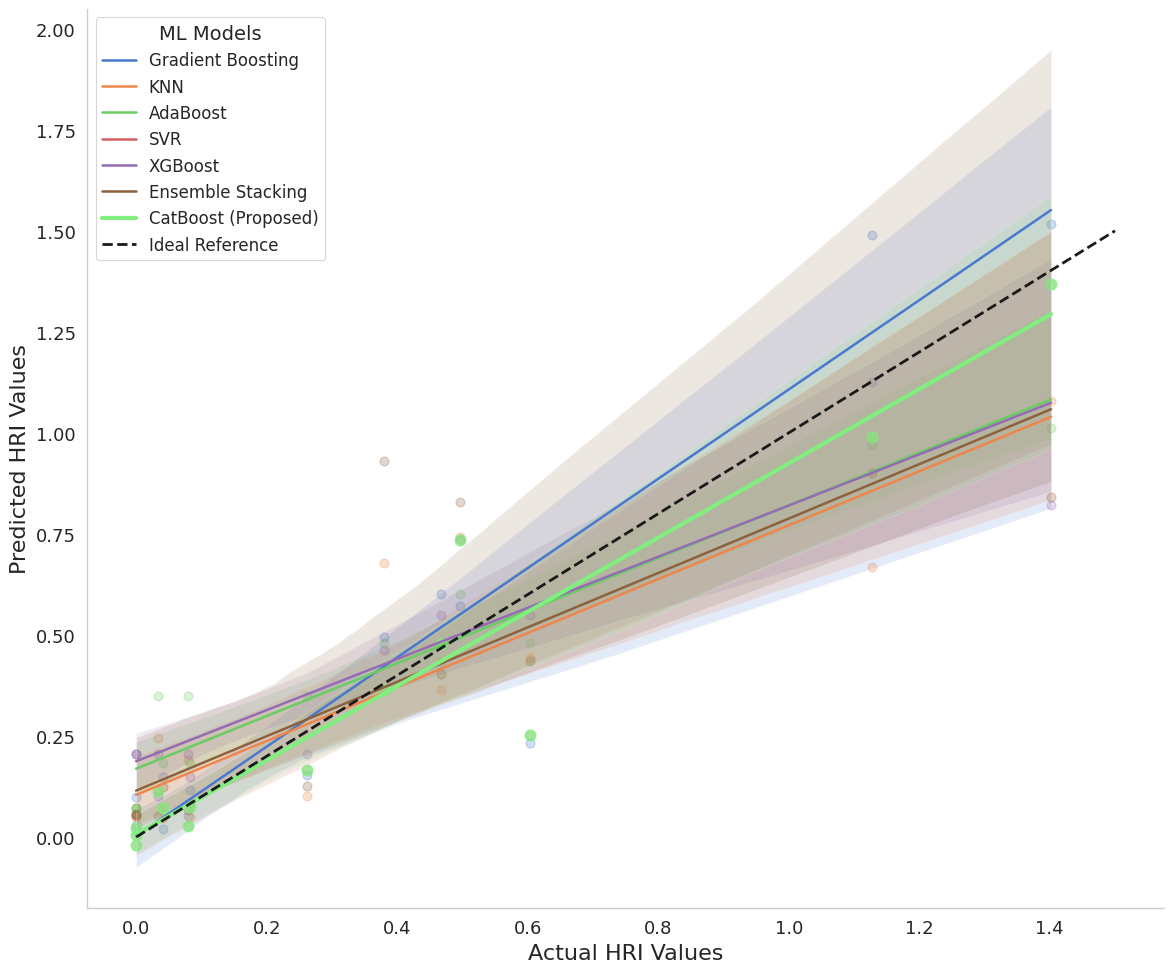

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from joblib import load

# Load models
model_paths = {
    'Gradient Boosting': "/home/kumail/Energy_AI/Honey Model/Models/GB_model.pkl",
    'KNN': "/home/kumail/Energy_AI/Honey Model/Models/KNN_model.pkl",
    'AdaBoost': "/home/kumail/Energy_AI/Honey Model/Models/AB_model.pkl",
    'SVR': "/home/kumail/Energy_AI/Honey Model/Models/SVR_model.pkl",
    'XGBoost': "/home/kumail/Energy_AI/Honey Model/Models/XGB_model.pkl",
    'Ensemble Stacking': "/home/kumail/Energy_AI/Honey Model/Models/stacking_model_model.pkl",
    'CatBoost': "/home/kumail/Energy_AI/Honey Model/Models/CB_model.pkl",
}

# Predict
models, predictions = {}, {}
for name, path in model_paths.items():
    models[name] = load(path)
    predictions[name] = models[name].predict(X_test_scaled)

# Prepare results
results_df = pd.DataFrame({'Actual': Y_test})
for name, preds in predictions.items():
    results_df[name] = preds

# Melt for seaborn
results_melted = results_df.reset_index().melt(
    id_vars=['index', 'Actual'],
    value_vars=list(model_paths.keys()),
    var_name='Model',
    value_name='Predicted'
)

# Professional style
sns.set(style="whitegrid", context="paper", font_scale=1.6)
custom_palette = sns.color_palette("muted", len(model_paths))
highlight_color = '#80EF80'  # Highlight CatBoost instead of KNN

# Plot
plt.figure(figsize=(12, 10))

for i, model in enumerate(model_paths.keys()):
    temp_df = results_melted[results_melted['Model'] == model]
    if model == 'CatBoost':  # Change from 'KNN' to 'CatBoost'
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 60, 'alpha': 0.7, 'color': highlight_color},
            line_kws={'label': 'CatBoost (Proposed)', 'color': highlight_color, 'lw': 3},
            color=highlight_color
        )
    else:
        sns.regplot(
            data=temp_df,
            x='Actual',
            y='Predicted',
            scatter_kws={'s': 40, 'alpha': 0.25},
            line_kws={'label': model, 'color': custom_palette[i], 'lw': 1.8},
            color=custom_palette[i]
        )

# Ideal Line
min_val = 0
max_val = 1.5
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Reference')

# Labeling
plt.xlabel('Actual HRI Values', fontsize=16)
plt.ylabel('Predicted HRI Values', fontsize=16)

# Ticks
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Legend
plt.legend(
    title='ML Models',
    title_fontsize=14,
    fontsize=12,
    frameon=True,
    fancybox=True,
    shadow=False,
    loc='upper left'
)

# Final touches
sns.despine()
plt.grid(False)
plt.tight_layout()

# Save high-res
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/CatBoost_regression_comparison.tiff", format='tiff', dpi=300, bbox_inches='tight')

plt.show()


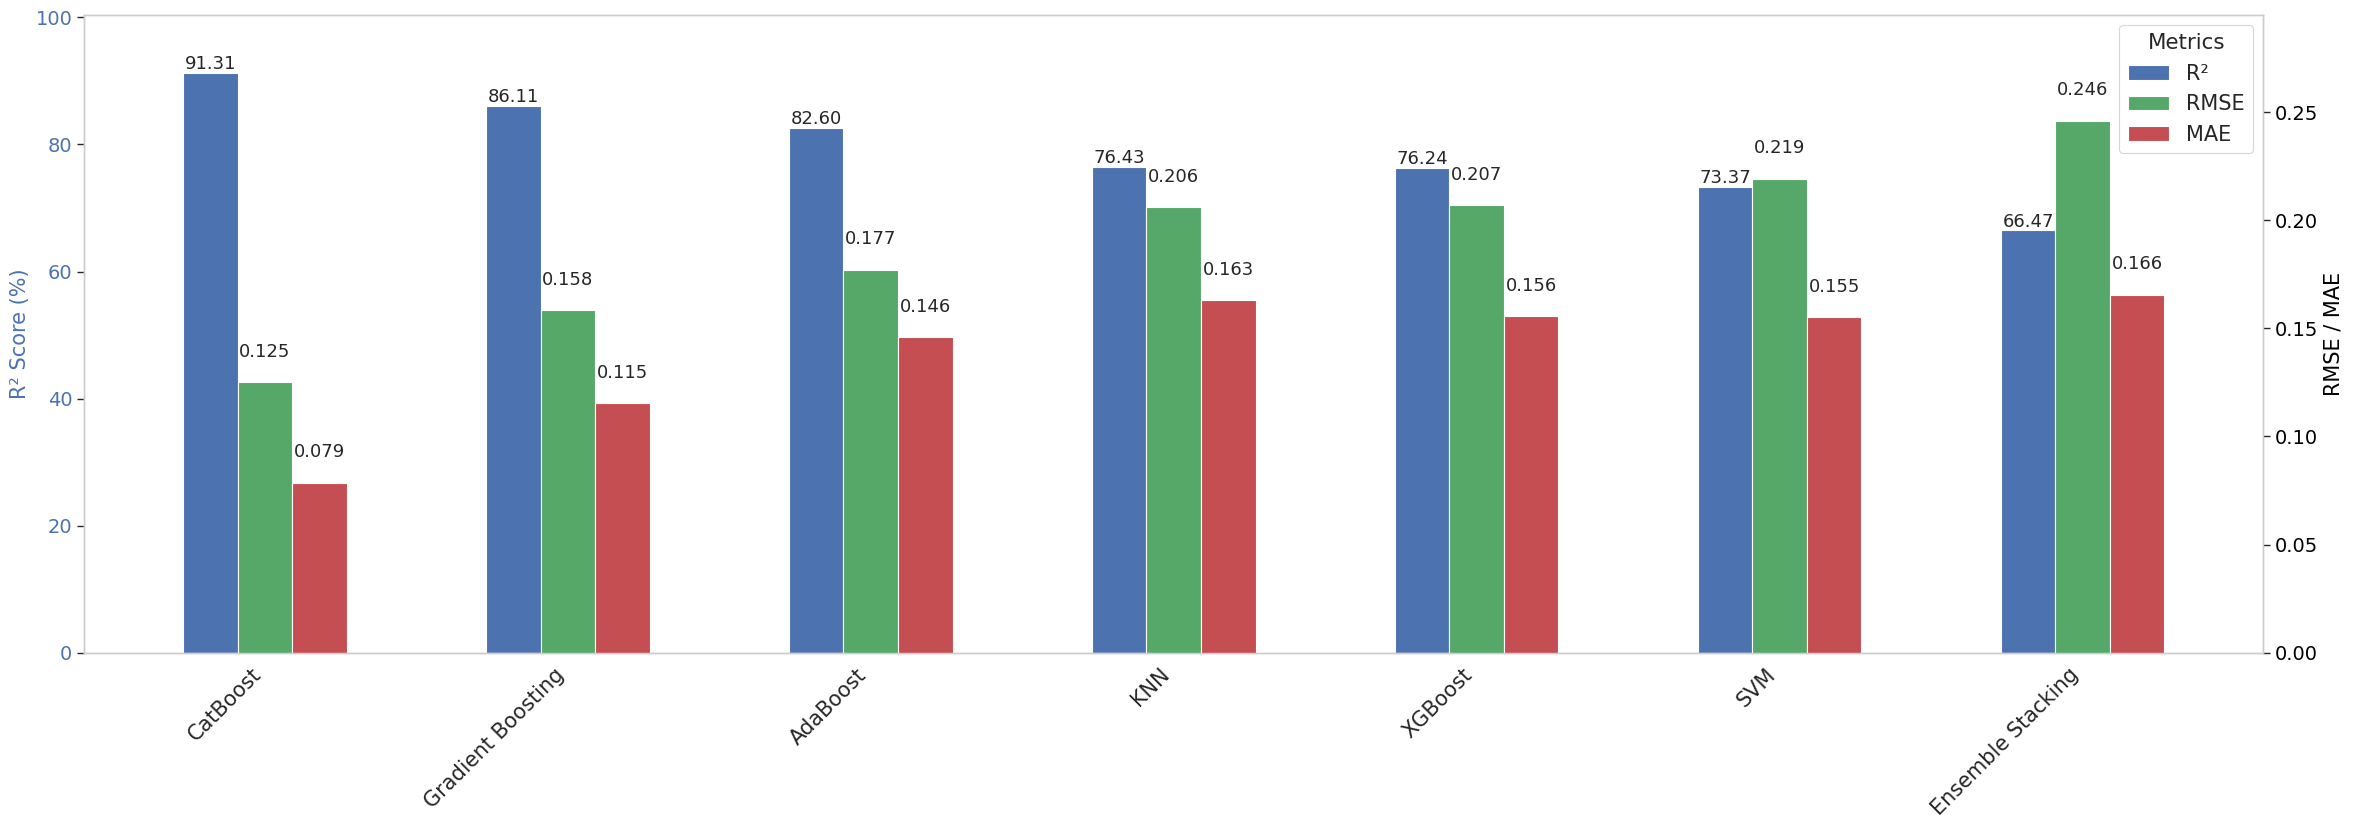

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['CatBoost', 'Gradient Boosting','AdaBoost','KNN',  'XGBoost' ,'SVM',  'Ensemble Stacking']
r2_scores = [91.31, 86.11, 82.60, 76.43,  76.24, 73.37,  66.47]
rmse_scores = [0.1252,  0.1583, 0.1771, 0.2061, 0.2070, 0.2192,  0.2459]
mae_scores = [0.0787, 0.1154,0.1458, 0.1631,  0.1556, 0.1551,  0.1655]

# Setup
x = np.arange(len(models))
bar_width = 0.18
fig, ax1 = plt.subplots(figsize=(14, 9))

# Primary y-axis (left) for R²
bars1 = ax1.bar(x - bar_width, r2_scores, width=bar_width, label='R²', color='#4C72B0')
ax1.set_ylabel('R² Score (%)', fontsize=15, color='#4C72B0')
ax1.tick_params(axis='y', labelcolor='#4C72B0')
ax1.set_ylim(0, max(r2_scores) * 1.1)

# Secondary y-axis (right) for RMSE & MAE
ax2 = ax1.twinx()
bars2 = ax2.bar(x, rmse_scores, width=bar_width, label='RMSE', color='#55A868')
bars3 = ax2.bar(x + bar_width, mae_scores, width=bar_width, label='MAE', color='#C44E52')
ax2.set_ylabel('RMSE / MAE', fontsize=15, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(max(rmse_scores), max(mae_scores)) * 1.2)

# X-axis
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=15)

# Title and layout
#fig.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1.7, 0.95])

# Annotations
def annotate(bars, ax, fmt='%.2f'):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, fmt % height,
                ha='center', va='bottom', fontsize=13)
ax1.grid(False)
ax2.grid(False)
annotate(bars1, ax1, fmt='%.2f')
annotate(bars2, ax2, fmt='%.3f')
annotate(bars3, ax2, fmt='%.3f')

# Legend (combine both axes)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(handles, labels, title='Metrics', fontsize=15, loc='upper right')
plt.savefig("/home/kumail/Energy_AI/Honey Model/Models/Models_comparison.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.show()